In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
df=pd.read_csv('data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,NaN,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,NaN,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      501 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Preprocessing for filling missing attributes


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')    
imputer.fit(df)                            

SimpleImputer(strategy='median')

In [6]:
imputer.statistics_                   

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.77000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [7]:
df_processed=pd.DataFrame(imputer.transform(df),columns=df.columns)   #missing attributes filling

In [8]:
df_processed                                                  ## processed data with no empty space

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,77.7,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df_processed['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [10]:
df_processed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.694269,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.099796,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

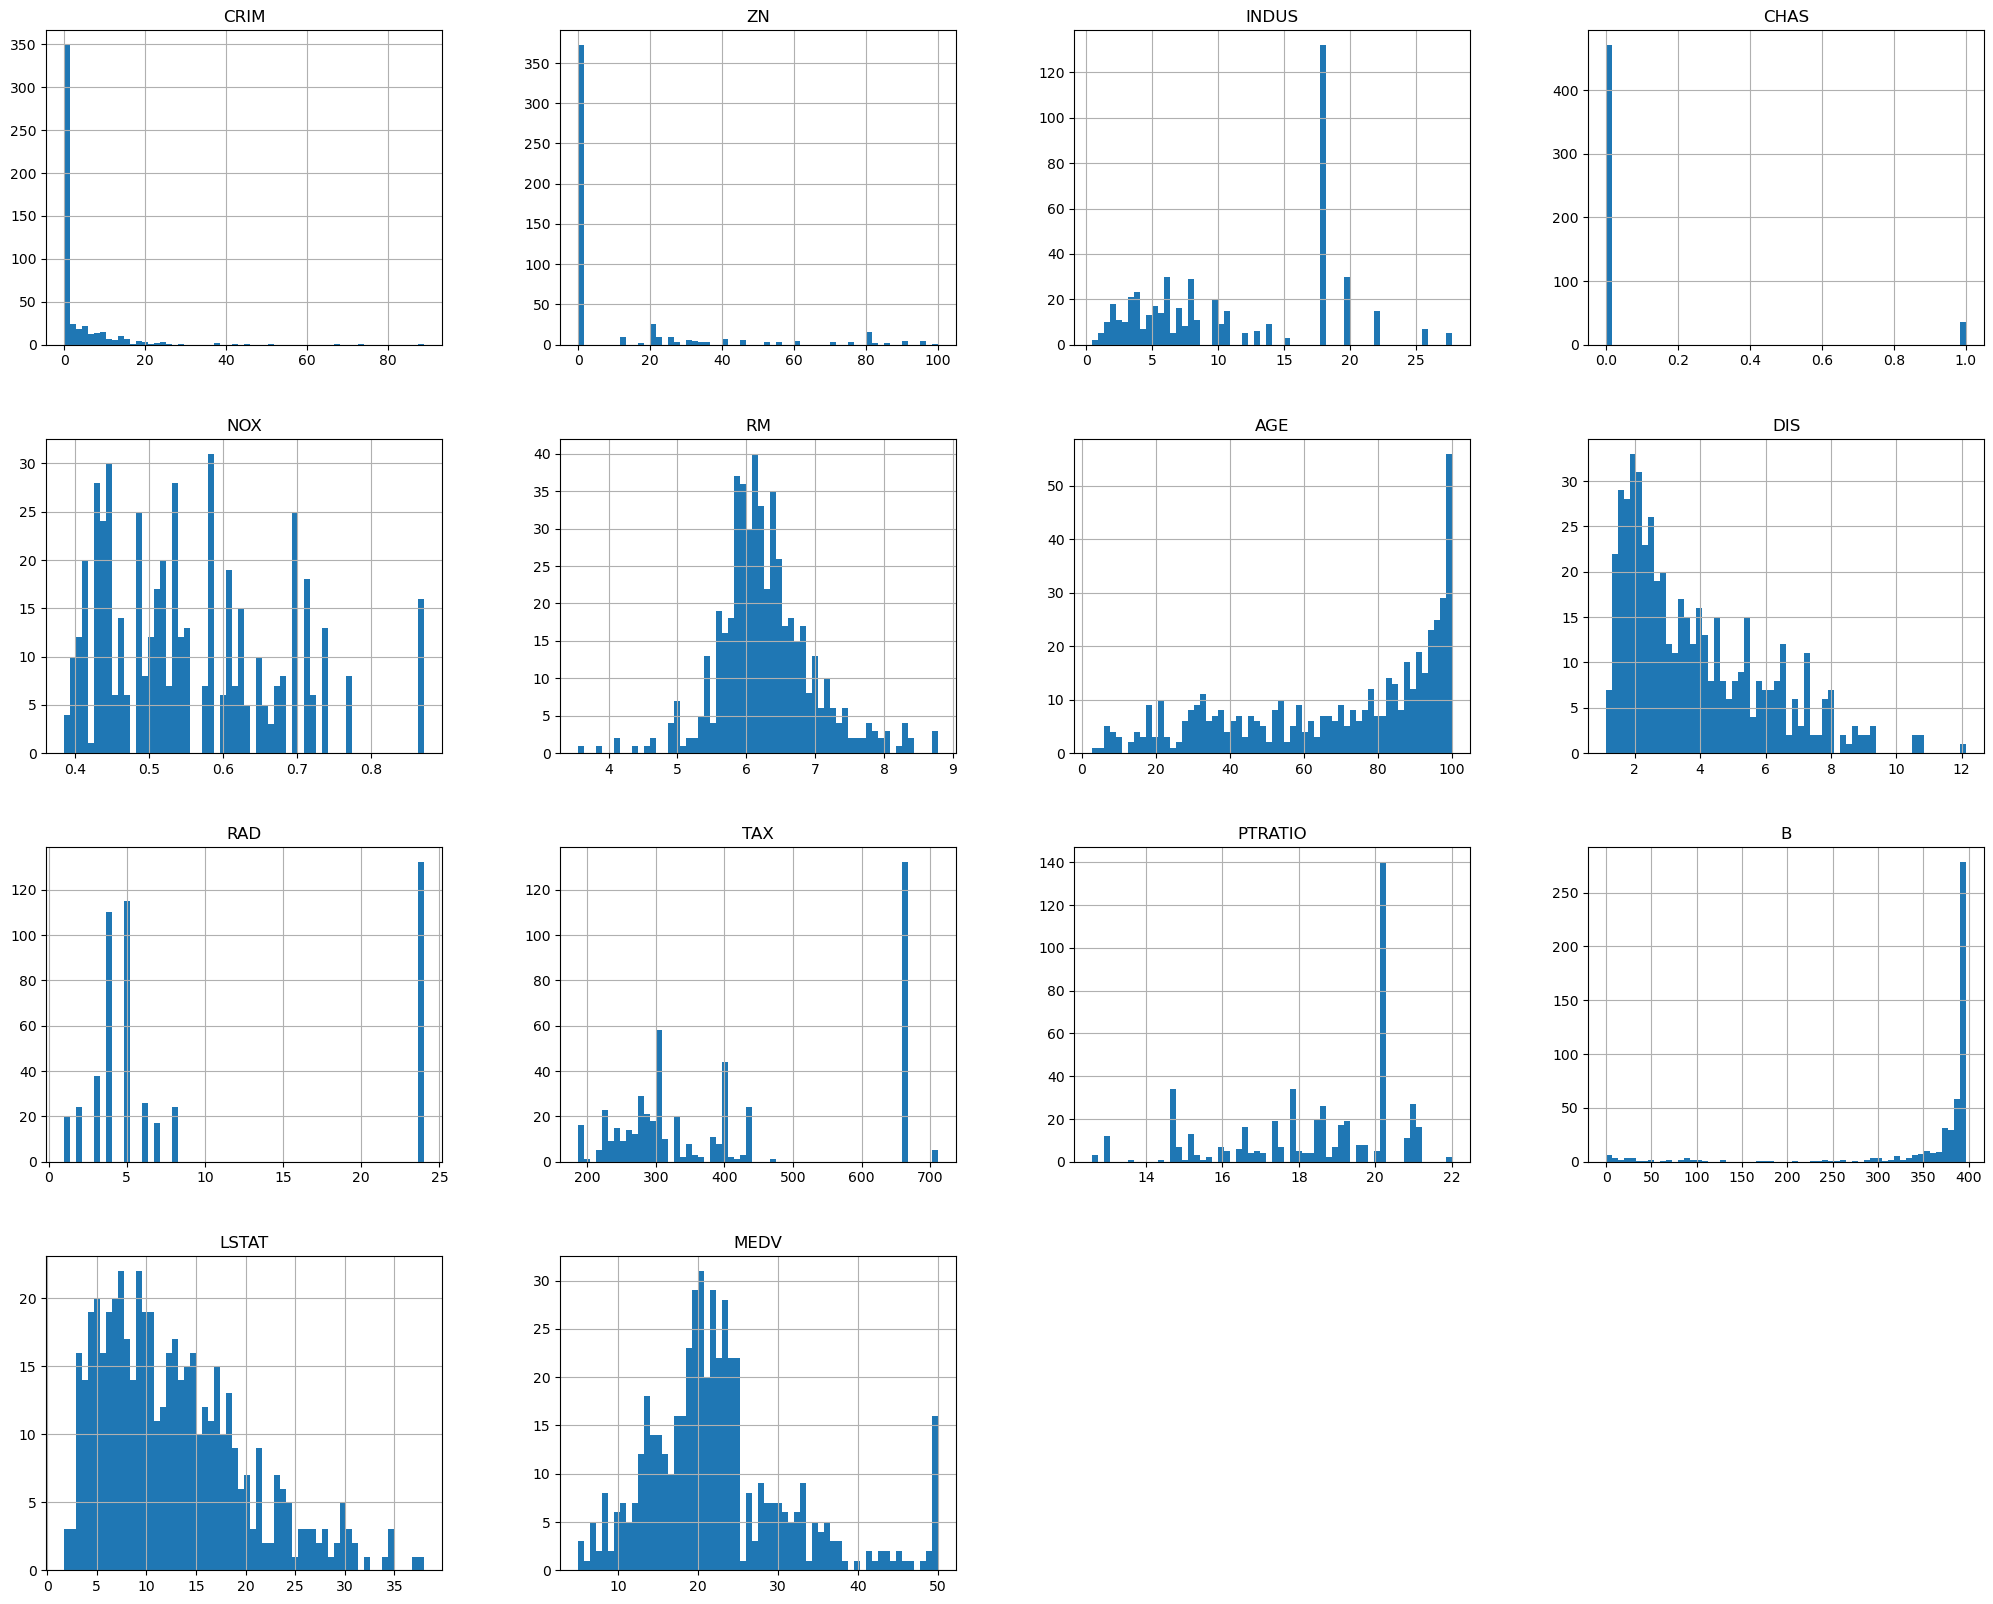

In [12]:
df_processed.hist(bins=60, figsize=(25,20))                     # histogram 

both train and test has same % of CHAS 


# looking for correlation
looking at the correlation you will get to know which attribute affect the most to the price so you can plot the histogram to see the effect by selecting those attributes only

positive effect-increases the price

negative effect decreases the price 

In [13]:
corr_matrix= df_processed.corr()               # we can check which attribute affect the most on the output by correlation
#print(corr_matrix)
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.374106
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='RM', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

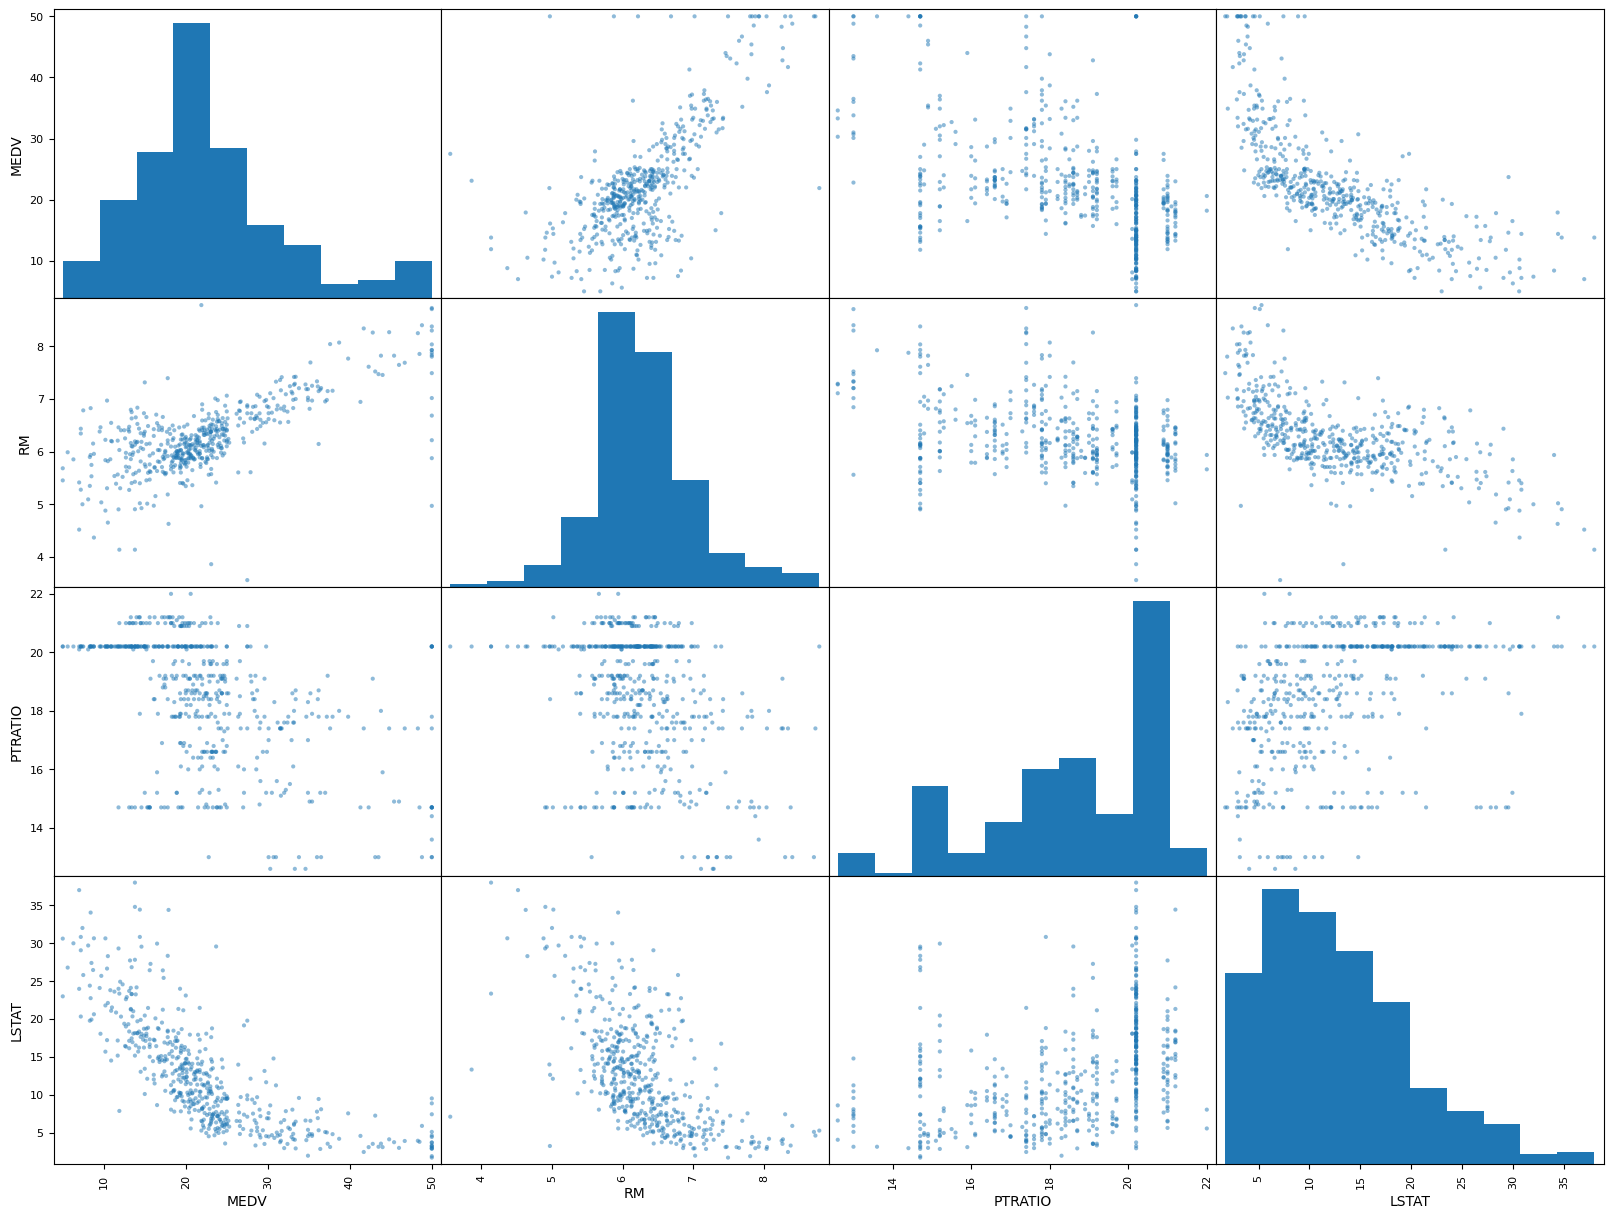

In [14]:
from pandas.plotting import scatter_matrix              # plotting of output and attributes to check the effect of the attributes on output
attributes = ['MEDV','RM','PTRATIO','LSTAT']     
scatter_matrix(df_processed[attributes],figsize=(20,15))

# Feature Engineering
###### Contribution of attributes with high correlation

In [15]:
#df_processed['TAXRM'] =df_processed['TAX']/df_processed['RM']    

In [16]:
#df_processed.head()

In [17]:

#corr_mattrix=df_processed.corr()            # correlation checking of attribute combination
#corr_mattrix['MEDV'].sort_values(ascending=False)

In [18]:
#df_processed.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

# train test split
 during train test split there is chance of splitting same kind of value to train set and other value to test set. so we can do stratifiedshufflesplit so values get splitted in equal ratio in both sets

In [19]:
df_processed['CHAS'].value_counts()    


0.0    471
1.0     35
Name: CHAS, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_processed,test_size=0.2, random_state=42)
print(f"rows in training set are {len (train_set)}\n and testing set are {len (test_set)}")

rows in training set are 404
 and testing set are 102


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in split.split(df , df_processed['CHAS']):
    strat_train_set = df_processed.loc[train]
    strat_test_set = df_processed.loc[test]

In [22]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0.0,0.507,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3


In [23]:
strat_test_set.shape

(102, 14)

In [24]:
strat_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

# separating attributes and labels

In [25]:
attributes_train_set= strat_train_set.drop("MEDV", axis=1)
labels_train_set= strat_train_set['MEDV'].copy()
print (attributes_train_set.shape)
print(labels_train_set.shape)


(404, 13)
(404,)


# pipeline


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ("std_scaler",StandardScaler()),      # you can add as many things as you want
                       ])

In [27]:
housing = my_pipeline.fit_transform(attributes_train_set)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing,labels_train_set )

RandomForestRegressor()

# Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(housing)
mse = mean_squared_error(labels_train_set, prediction)
rmse = np.sqrt(mse)

In [30]:
rmse

1.2046052329816315

# using better evaluation technique 

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing, labels_train_set, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [32]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [33]:
print_scores(rmse_scores)

Scores: [2.88465961 2.87823065 4.45156388 2.61168046 3.40045074 2.61924596
 4.32971115 3.39143964 3.15867435 3.1701796 ]
Mean:  3.289583603912871
Standard deviation:  0.6105902157143858


# Saving the model 

In [34]:
arg=(model,my_pipeline)
from joblib import dump, load
dump(arg, 'Dragon.joblib') 


['Dragon.joblib']

In [35]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.734 11.395 25.723 22.152 18.56  14.954 19.47  14.231 31.151 41.99
 19.651 11.349 24.083 28.512 19.452 11.314 31.031 14.285 23.719 18.548
 19.866 17.972 17.347 21.989 18.262 31.668 15.63  33.126  8.675 33.218
 23.556 21.524 23.026 10.687 21.134 11.422 43.715 24.633 23.505 42.674
 24.177 28.966 20.624 20.706 18.825 33.661 44.835 20.308 20.531 21.951
 21.954 14.382 20.838 14.828 25.368 32.577 42.38  29.083 19.072 20.876
 47.093 10.202 19.158 25.764 14.663 33.604 19.885 17.884 19.577 34.088
 25.995 23.145 21.506 22.629 33.973 13.11  15.569 20.037 21.102 21.543
 22.569 21.414 14.273 22.978 20.719 21.318 13.823 21.155 22.144 23.431
 18.344 26.836  7.744 26.816 19.859 28.896 19.845 31.487 14.512 26.728
 21.649 20.108] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [36]:
final_rmse

2.9353636946054635

In [37]:
from joblib import dump, load
import numpy as np
model,pipe = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.241])

In [38]:
a=np.array([[4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68]])
X_test_prepared = my_pipeline.transform(a)
print(X_test_prepared)
final_predictions = model.predict(X_test_prepared)
print(final_predictions)

[[ 0.15682292 -0.4898311   0.98336806 -0.27288841  0.47919371  0.28660512
   0.86829259 -0.68730678  1.63579367  1.50571521  0.81196637  0.44624347
   0.81480158]]
[16.158]


C:\Users\Avdhut\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
